# Анализ оттока клиентов банка

# Материалы
* [Презентация] (https://drive.google.com/file/d/1iySpYBnmCqq1oJl10omiKj9_gbRh1GjK/view?usp=share_link)
* [Дашборд] (https://public.tableau.com/views/_16844078886780/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link)

# Описание проекта

### Контекст

Заказчик - банк «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Необходимо проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

### Цель

Определить особенности параметров и характеристики клиентов, попадающих в группу оттока для разработки мер по удержанию клиентов

### Задачи

На основании поведения клиентов определить вероятность их ухода:

- Провести исследовательский анализ данных;
- Выделить портреты клиентов, которые склонны уходить из банка;
- Сформулировать и проверить статистические гипотезы:


    - Гипотеза различия дохода между действующими и ушедшими клиентами;
    - Гипотеза различия баллов кредитного скоринга между действующими и ушедшими клиентами;
    - Гипотеза различия возраста между действующими и ушедшими клиентами.
    
    
- По результатам исследования необходимо подготовить:


    - презентацию,
    - дашборд.

### Описание исходных данных

Датасет содержит данные о клиентах банка «Метанпром».

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

### План работы

1. Загрузим данные и изучим общую информацию;
2. Проведем предобработку данных:
    - проверим стиль названия и порядок столбцов;
    - проверим пропуски;
    - проверим дубликаты;
    - проверим соответствие типов данных;
    - категоризация данных.
3. Проведем исследовательский анализ данных:
    - анализ распределения средних значений параметров:
        - изучим влияние категориальных параметров на отток клиентов;
        - изучим влияние численных параметров на отток клиентов;
        - изучим редкие и выбивающиеся значений;
    - корреляционный анализ.
4. Выделим портреты клиентов, склонных уходить из банка;
5. Сформулируем и проверим статистические гипотезы;
6. Проведем сегментацию клиентов
7. Опишем выводы на основе проведенного анализа и дадим рекомендации;
8. Подготовим презентацию и дашборд.

## Изучение данных

### Загрузка необходимых библиотек и изучение общей информации

In [1]:
# импортируем необходимые библиотеки для проведения анализа

import pandas as pd
import numpy as np
import math as mth

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12, 5)})
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import requests
import scipy.stats as stats
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_colwidth', 1)

In [2]:
# загрузим данные для анализа

try:
    data = pd.read_csv('/datasets/bank_dataset.csv')
except:
    data = pd.read_csv('https://disk.yandex.ru/d/JVAJ9uxtV1uydQ')

In [3]:
# посмотрим общую информацию о данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
# посмотрим на первые десять строк таблицы

data.head(10)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0
5,15616748,645,Рыбинск,М,44,8,"113,755.78",2,1,0,"149,756.71",1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,"10,062.80",0
7,15698884,376,Ростов Великий,Ж,29,4,"115,046.74",4,1,0,"119,346.88",1
8,15835101,501,Ярославль,М,44,4,"142,051.07",2,0,1,"74,940.50",0
9,15635125,684,Ярославль,М,27,2,"134,603.88",1,1,1,"71,725.73",0


### Предварительный вывод и шаги предобработки данных

**Промежуточный вывод 1:**

В датасете представлено:
- 10 000 строк и 12 столбцов, из которых в одном столбце `Balance` с данными о балансе счета клиента имеются 3617 пропусков;
- в столбцах представлены три типа данных - строки, целочисленные и вещественные числа. С типом данных все в порядке;

Шаги предобработки данных:
- приведем названия столбцов в единый регистр и стиль;
- проверим характер пропусков в столбце `Balance`;
- проверим дубликаты;
- приведем значения в столбце `Balance` и `estimated_salary` к целочисленному для удобства;
- проведем категоризацию данных.

## Предобработка данных

### Проверка стиля названий и порядка столбцов

In [5]:
# приведем названия столбцов к нижнему регистру, изменим стиль названия

data.columns = data.columns.str.lower()
data = data.rename(columns={'userid' : 'user_id', 'creditcard': 'credit_card'})

data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

### Проверка пропусков

In [6]:
# проверим количество пропущенных значений в столбце Balance

len(data[data['balance'].isna()])

3617

Более чем 3-я часть пропущенных значений, удалить их мы не можем. Предположим, что пропуски в этом столбце означают отсутствие у клиента счета в банке (например, дебетовой карты), а значит можно заменить пропущенные значения на нули.

In [7]:
# произведем замену пропусков на нули

data['balance'] = data['balance'].fillna(0)

Посмотрим на характер и признаки пропусков (уже заполненных нулями). Для этого создадим отдельный датафрейм для клиентов с нулевым балансом

In [8]:
# создадим отдельный датафрейм и посмотрим на распределение между городами для клиентов с нулевым балансом

balance_null = data[data['balance'] == 0]
balance_null['city'].value_counts().to_frame()

,city
Ярославль,2418
Рыбинск,1199


In [9]:
# посмотрим на активность клиента с нулевым балансом

balance_null['loyalty'].value_counts().to_frame()

,loyalty
1,1873
0,1744


In [10]:
# посмотрим на наличие кредитной карты у клиента с нулевым балансом

balance_null['credit_card'].value_counts().to_frame()

,credit_card
1,2592
0,1025


In [11]:
# теперь посмотрим на количество действующих и ушедших клиентов с нулевым балансом

balance_null['churn'].value_counts().to_frame()

,churn
0,3117
1,500


Нулевые значения в значениях баланса на счете встречаются:
- в 2-х городах из 3-х, в Ярославле - 2418, в Рыбинске - 1199;
- активность клиентов распределяется примерно поровну;
- у 2592 клиентов есть, 1025 - не имеют кредитной карты;
- 3117 действующих и 500 ушедших клиентов.

Характер и признаки нулевых значений в значениях баланса на счете клиента выявить не удалось. Возможно это просто незаполненные данные, либо техническая особенность системы для клиентов не имеющих дебетовой карты.

### Проверка дубликатов

In [12]:
# проверим количество дубликатов

data.duplicated().sum()

0

### Проверка соответствия типов данных

In [13]:
# для удобства приведем столбец с балансом и зарплатой к целочисленному типу

data['balance'] = data['balance'].astype('int')
data['estimated_salary'] = data['estimated_salary'].astype('int')

In [14]:
# проверим корректность замены после предобработки

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           10000 non-null  int64 
 1   score             10000 non-null  int64 
 2   city              10000 non-null  object
 3   gender            10000 non-null  object
 4   age               10000 non-null  int64 
 5   objects           10000 non-null  int64 
 6   balance           10000 non-null  int64 
 7   products          10000 non-null  int64 
 8   credit_card       10000 non-null  int64 
 9   loyalty           10000 non-null  int64 
 10  estimated_salary  10000 non-null  int64 
 11  churn             10000 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 937.6+ KB


### Категоризация данных

In [15]:
# для категоризации создадим копию датафрейма

data_category = data.copy()

#### Категоризация по баллам кредитного скоринга

In [16]:
# напишем функцию по категоризации баллов кредитного скоринга и добавим новый столбец в таблицу

def score_category(data_category):
    
    if data_category['score'] < 600:
        return 'низкий балл'
    elif data_category['score'] <= 700:
        return 'средний балл'
    else:
        return 'высокий балл'

data_category['score_category'] = data_category.apply(score_category, axis=1)

In [17]:
# посмотрим на количество клиентов в разрезе баллов кредитного скоринга

score_category = data_category['score_category'].value_counts().to_frame().reset_index()
score_category.columns = ['score_category', 'amount']
score_category

,score_category,amount
0,средний балл,3850
1,высокий балл,3116
2,низкий балл,3034


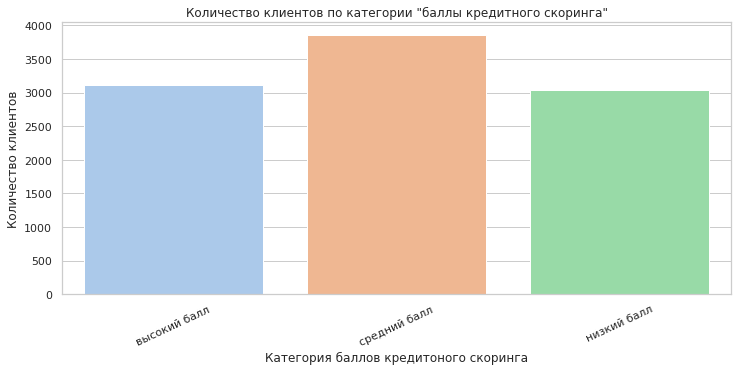

In [18]:
# построим гистограмму с отображением баллов кредитного скоринга и их количеством

sns.barplot(x = 'score_category', y = 'amount', palette = 'pastel', data = score_category,
           order=["высокий балл", "средний балл", "низкий балл"])
plt.ylabel('Количество клиентов')
plt.xlabel('Категория баллов кредитоного скоринга')
plt.title('Количество клиентов по категории "баллы кредитного скоринга"')
plt.xticks(rotation=25);

Почти 40% клиентов имеют средний балл кредитного скоринга (что, по данным из Интернета достаточно для одобрения кредита). Около 31% клиентов имеют высокий и 30% - низкий баллы.

#### Категоризация по возрасту

In [19]:
# напишем функцию по категоризации возраста и добавим новый столбец в таблицу

def age_category(data_category):
    
    if data_category['age'] <= 45:
        return '18-45 лет'
    elif data_category['age'] <= 60:
        return '46-60 лет'
    else:
        return 'старше 61 года'

data_category['age_category'] = data_category.apply(age_category, axis=1)

In [20]:
# посмотрим на количество клиентов в разрезе по возрасту

age_category = data_category['age_category'].value_counts().to_frame().reset_index()
age_category.columns = ['age_category', 'amount']
age_category

,age_category,amount
0,18-45 лет,7889
1,46-60 лет,1647
2,старше 61 года,464


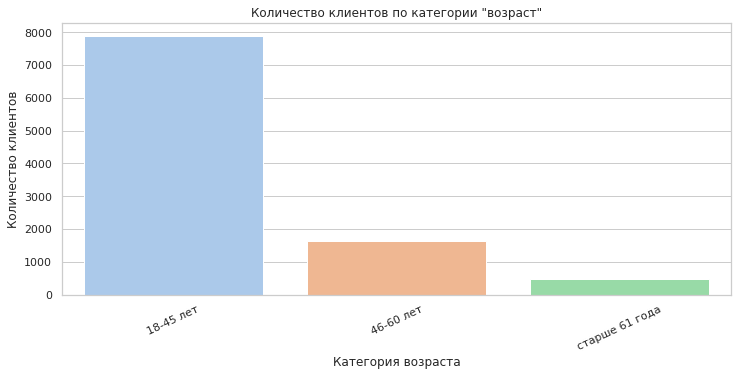

In [21]:
# построим гистограмму с отображением возрастных категорий клиентов и их количеством

sns.barplot(x = 'age_category', y = 'amount', palette = 'pastel', data = age_category)
plt.ylabel('Количество клиентов')
plt.xlabel('Категория возраста')
plt.title('Количество клиентов по категории "возраст"')
plt.xticks(rotation=25);

В данной категории почти 80% клиентов от 18 до 45 лет, около 15% - в диапазоне от 46 до 60 лет, около 5% - старше 61 года.

#### Категоризация по количеству объектов в собственности

In [22]:
# напишем функцию по категоризации количества объектов в собственности и добавим новый столбец в таблицу

def objects_category(data_category):
    
    if data_category['objects'] == 0:
        return 'нет объектов'
    elif data_category['objects'] < 3:
        return '1-2 объекта'
    elif data_category['objects'] <= 5:
        return '3-5 объектов'
    else:
        return 'более 5 объектов'

data_category['objects_category'] = data_category.apply(objects_category, axis=1)

In [23]:
# посмотрим на количество клиентов в разрезе по количеству объектов в собственности

objects_category = data_category['objects_category'].value_counts().to_frame().reset_index()
objects_category.columns = ['objects_category', 'amount']
objects_category

,objects_category,amount
0,более 5 объектов,4494
1,3-5 объектов,3010
2,1-2 объекта,2083
3,нет объектов,413


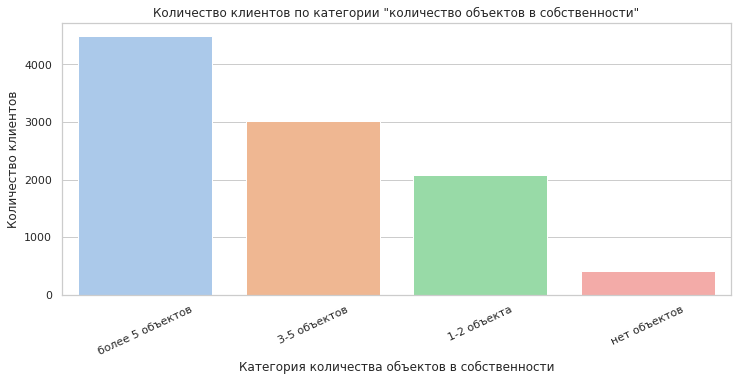

In [24]:
# построим гистограмму с отображением категории объектов в собственности клиентов

sns.barplot(x = 'objects_category', y = 'amount', palette = 'pastel', data = objects_category)
plt.ylabel('Количество клиентов')
plt.xlabel('Категория количества объектов в собственности')
plt.title('Количество клиентов по категории "количество объектов в собственности"')
plt.xticks(rotation=25);

У 45% клиентов в собственности более 5 объектов, что довольно неожиданно. 30% имеет от 3 до 5 объектов, 20% - от 1 до 2 объектов, и около 4% не имеет объектов.

#### Категоризация по балансу на счете

In [25]:
# напишем функцию по категоризации баланса на счете и добавим новый столбец в таблицу

def balance_category(data_category):
    
    if data_category['balance'] <= 5000:
        return 'менее 5000'
    elif data_category['balance'] <= 30000:
        return '5 000 - 30 000'
    elif data_category['balance'] <= 50000:
        return '30 000 - 50 000'
    elif data_category['balance'] <= 100000:
        return '50 000 - 100 000'
    else:
        return 'более 100 000'

data_category['balance_category'] = data_category.apply(balance_category, axis=1)

In [26]:
# посмотрим на количество клиентов в разрезе по балансу на счете

balance_category = data_category['balance_category'].value_counts().to_frame().reset_index()
balance_category.columns = ['balance_category', 'amount']
balance_category

,balance_category,amount
0,более 100 000,4799
1,менее 5000,3618
2,50 000 - 100 000,1509
3,30 000 - 50 000,63
4,5 000 - 30 000,11


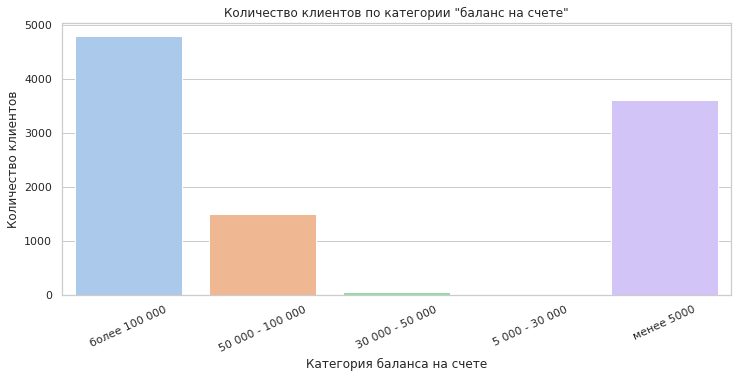

In [27]:
# построим гистограмму с отображением количества клиентов в разрезе по балансу на счете

sns.barplot(x = 'balance_category', y = 'amount', palette = 'pastel', data = balance_category, 
            order=["более 100 000", "50 000 - 100 000", "30 000 - 50 000", "5 000 - 30 000", "менее 5000"])
plt.ylabel('Количество клиентов')
plt.xlabel('Категория баланса на счете')
plt.title('Количество клиентов по категории "баланс на счете"')
plt.xticks(rotation=25);

Почти 50% клиентов имеют на счете более 100 000, 15% - от 50 до 100 тысяч. В категории от 30 до 50 тысяч около 6%, от 5 до 30 тысяч - около 1%. Внушительный процент имеет менее 5000 на счете - около 36%.

#### Категоризация по заработной плате клиента

In [28]:
# напишем функцию по категоризации заработной платы и добавим новый столбец в таблицу

def salary_category(data_category):
    
    if data_category['estimated_salary'] <= 50000:
        return 'низкий достаток'
    elif data_category['estimated_salary'] <= 100000:
        return 'средний достаток'
    else:
        return 'высокий достаток'

data_category['salary_category'] = data_category.apply(salary_category, axis=1)

In [29]:
# посмотрим на количество клиентов в разрезе по заработной плате

salary_category = data_category['salary_category'].value_counts().to_frame().reset_index()
salary_category.columns = ['salary_category', 'amount']
salary_category

,salary_category,amount
0,высокий достаток,5010
1,средний достаток,2537
2,низкий достаток,2453


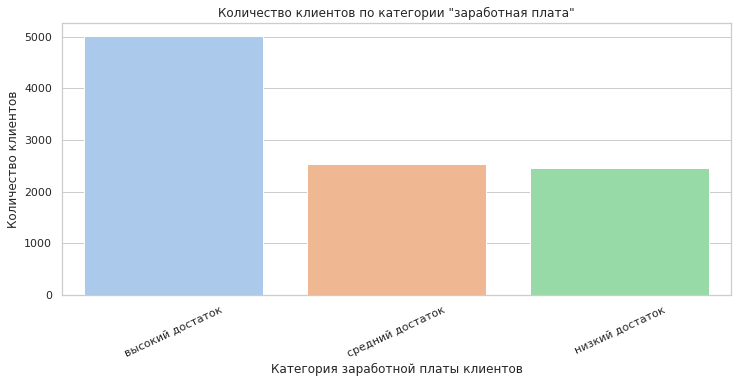

In [30]:
# построим гистограмму с отображением категорий заработной платы клиентов

sns.barplot(x = 'salary_category', y = 'amount', palette = 'pastel', data = salary_category)
plt.ylabel('Количество клиентов')
plt.xlabel('Категория заработной платы клиентов')
plt.title('Количество клиентов по категории "заработная плата"')
plt.xticks(rotation=25);

50% клиентов имеют высокий достаток, около 25% клиентов имеют средний и низкий достатки.

**Промежуточный вывод 2:**

*Проведена предобработка данных:*

- привели названия столбцов к нижнему регистру, изменили стиль названия;
- проверили количество пропущенных значений в столбце Balance - 3617 из 10 000. Провели замену пропущенных значений на нули на основании предположения, что пропуски означают отсутствие у клиента счета в банке (например, дебетовой карты);
- проверили характер пропущенных (нулевых) значений, которые встречаются:
    - в 2-х городах из 3-х, в Ярославле - 2418, в Рыбинске - 1199;
    - активность клиентов распределяется примерно поровну;
    - у 2592 клиентов есть, 1025 - не имеют кредитной карты;
    - 3117 действующих и 500 ушедших клиентов.
    - характер и признаки нулевых значений в значениях баланса на счете клиента выявить не удалось. Возможно это просто незаполненные данные, либо техническая особенность системы для клиентов не имеющих дебетовой карты.
- проверили количество дубликатов - их нет;
- для удобства привели значения столбцов с балансом и зарплатой к целочисленному типу.

*Проведена категоризация данных*

- **Баллы кредитного скоринга** - почти 40% клиентов имеют средний балл (что, по данным из Интернета достаточно для одобрения кредита). Около 31% клиентов имеют высокий и 30% - низкий баллы.
- **Возраст** -  почти 80% клиентов от 18 до 45 лет, около 15% - в диапазоне от 46 до 60 лет, около 5% - старше 61 года.
- **Число объектов в собственности клиента** - у 45% клиентов в собственности более 5 объектов, что довольно неожиданно. 30% имеет от 3 до 5 объектов, 20% - от 1 до 2 объектов, и около 4% не имеет объектов.
- **Баланс на счете** - почти 50% клиентов имеют на счете более 100 000, 15% - от 50 до 100 тысяч. В категории от 30 до 50 тысяч около 6%, от 5 до 30 тысяч - около 1%. Внушительный процент имеет менее 5000 на счете - около 36%.
- **Заработная плата** - 50% клиентов имеют высокий достаток, около 25% клиентов имеют средний и низкий достатки.

## Исследовательский анализ данных

### Анализ распределения средних значений параметров

In [31]:
# посмотрим на параметры данных

data.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"15,733,676.57",650.53,38.92,5.01,"76,485.57",1.53,0.71,0.52,"100,089.75",0.20
std,"71,936.19",96.65,10.49,2.89,"62,397.19",0.58,0.46,0.50,"57,510.49",0.40
min,"15,608,437.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.00,0.00
25%,"15,671,264.25",584.00,32.00,3.00,0.00,1.00,0.00,0.00,"51,001.75",0.00
50%,"15,733,474.00",652.00,37.00,5.00,"97,198.00",1.00,1.00,1.00,"100,193.50",0.00
75%,"15,795,969.75",718.00,44.00,7.00,"127,643.75",2.00,1.00,1.00,"149,387.75",0.00
max,"15,858,426.00",850.00,92.00,10.00,"250,898.00",4.00,1.00,1.00,"199,992.00",1.00


- В выборке 10 000 уникальных клиентов;
- Разброс баллов кредитного скоринга находятся в пределах от 350 до 850, в среднем 650 на клиента;
- Возраст клиентов от 18 до 92 лет, средний возраст - около 39 лет;
- Среднее количество объектов в собственности у клиентов - 5, при этом имеются клиенты как без объектов, так и с 10 объектами;
- Средний баланс на счете около 80 000 с учетом того, что мы заменили пропущенные значения на нули;
- Продуктами пользуются все клиенты, в среднем - 1-2 продуктами;
- Кредитной картой в среднем пользуются около 70% клиентов;
- Средняя активность клиентов всего чуть более 50%;
- Заработная плата в среднем около 100 000. При этом довольно много клиентов с высоким доходом более 100 000;
- Средняя доля оттока 20%.

#### Изучение влияния категориальных параметров на отток клиентов

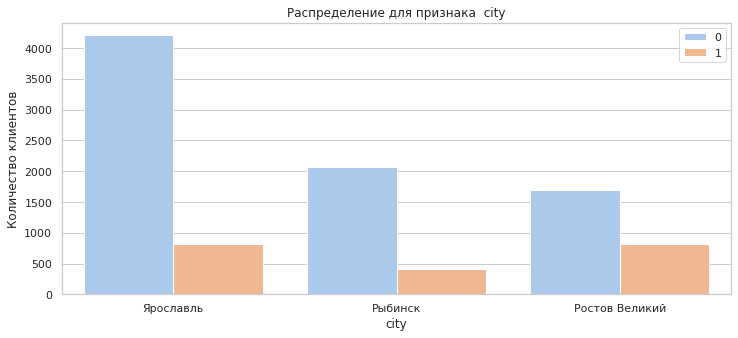

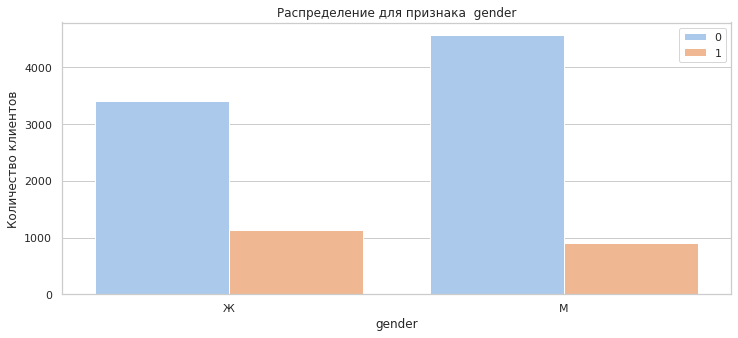

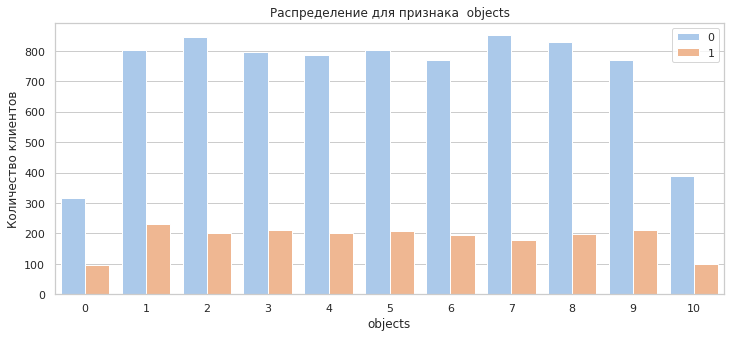

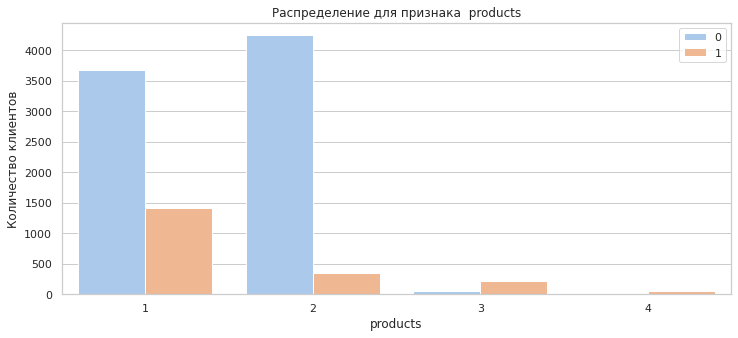

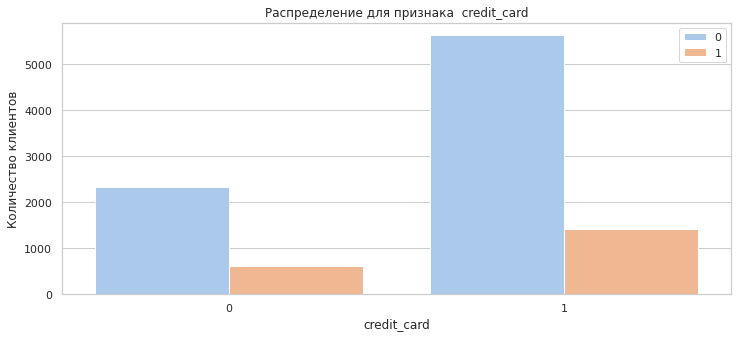

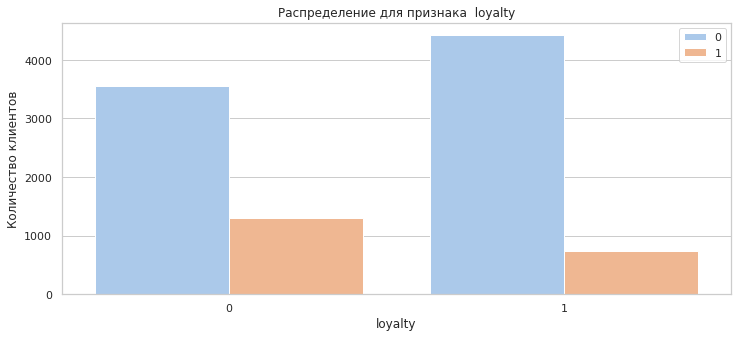

In [32]:
# Построим диаграммы для изучения влияния категориальных параметров на отток

for column in ['city','gender', 'objects', 'products','credit_card','loyalty']:
    sns.countplot(x = data[column], hue='churn', palette='pastel', data=data)
    plt.ylabel('Количество клиентов')
    plt.xlabel(column)
    plt.title('Распределение для признака ' + ' ' + column)
    plt.legend()
    plt.show()

По графикам для категориальных параметров можно сделать следующие выводы:

- больше всего клиентов попадает в отток из Ростова Великого, затем идет Ярославль (где находится половина клиентов), меньше всего в отток уходят в Рыбинске;
- женщины больше мужчин перестают пользоваться услугами банка;
- количество объектов в собственности от 1 до 9 дает больший процент оттока, нежели у клиентов с 0 и 10 объектами;
- с увеличением количества продуктов снижается количество ушедших клиентов, но при этом и оставшихся клиентов с 3 и 4 продуктами почти нет;
- в отток уходят больше те клиенты, кто пользуется кредитной картой;
- неактивные клиенты уходят с большей вероятностью.

#### Изучение влияния численных параметров на отток клиентов

In [33]:
# Напишем функцию для вывода гистограмм в разрезе оттока:

def numeric_plots(data, col, title):
    '''
    Функция поcтроения гистограмм распределения для численных параметров;
    
    На входе функции передаем параметры: датафрейм, название столбца, по которому строим график, название графика;
    '''
    fig, ax = plt.subplots(figsize = (12, 5))
    
    sns.histplot(data[data['churn']==0][col], label = 'остались', color = '#6495ED')
    sns.histplot(data[data['churn']==1][col], label = 'ушли', color = '#F4A460', alpha=0.8)
    plt.xlabel(col)
    plt.ylabel('Количество клиентов')
    plt.legend()
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()
    
    pass

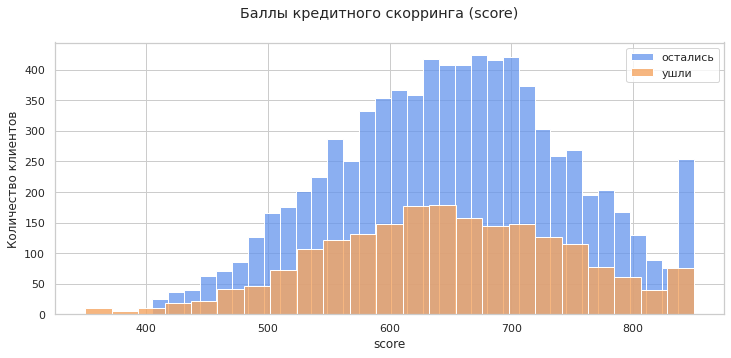

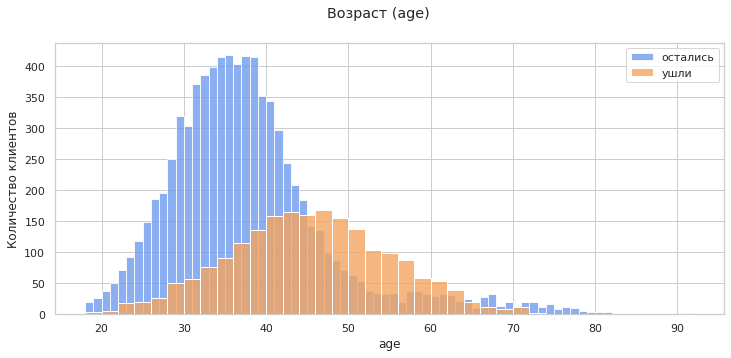

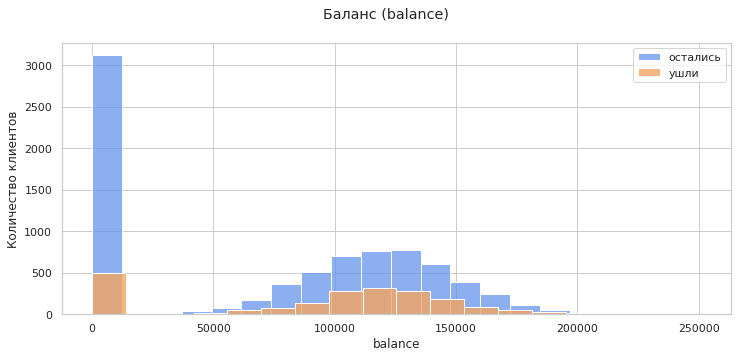

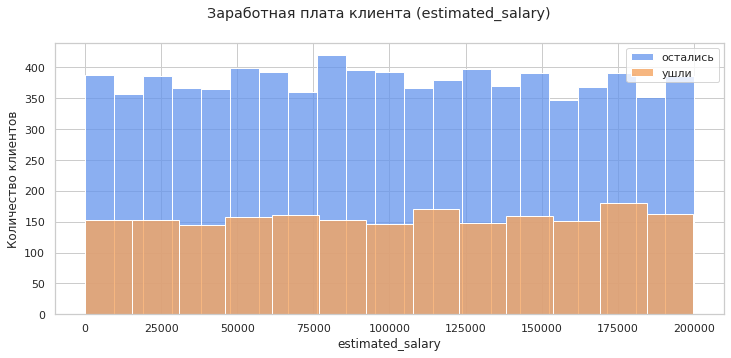

In [34]:
numeric = pd.DataFrame({'col' : ['score', 'age', 'balance', 'estimated_salary'], 
                        'title' : ['Баллы кредитного скорринга', 'Возраст', 
                                   'Баланс', 'Заработная плата клиента']
                       })

for index, row in numeric.iterrows():
    numeric_plots(data, row[0], row[1])

In [35]:
# Напишем функцию для вывода диаграмм размаха в разрезе оттока:

def numeric_plots(data, col, title):
    '''
    Функция построения диаграмм размаха для численных параметров;
    
    На входе функции передаем параметры: датафрейм, название столбца, по которому строим график, название графика;
    '''
    fig, ax = plt.subplots(figsize = (12, 5))
    
    sns.boxplot(y = col, x = 'churn', data = data, palette='pastel') 
    plt.xlabel(col)
    plt.ylabel('Количество клиентов')
    plt.xticks(np.arange(2), ('Действующие клиенты', 'Отток'))
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()
    
    pass

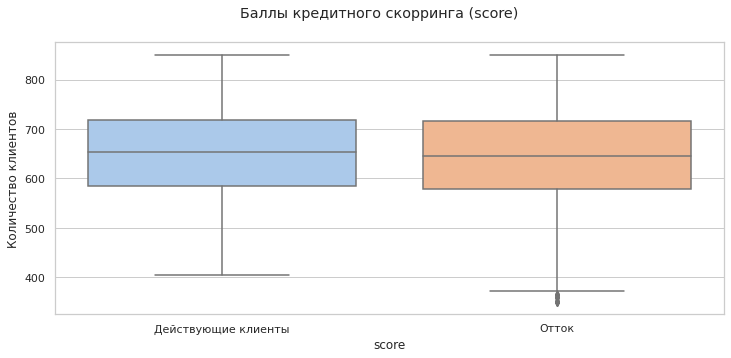

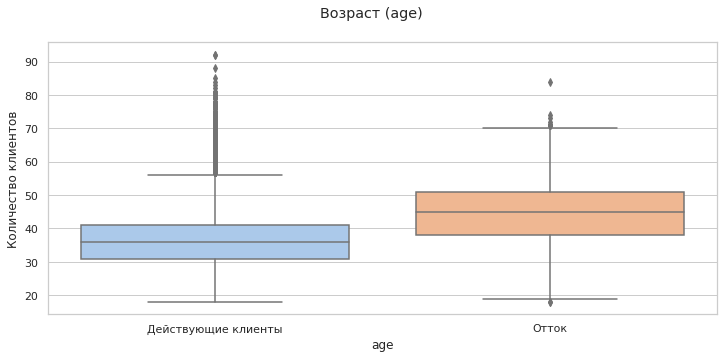

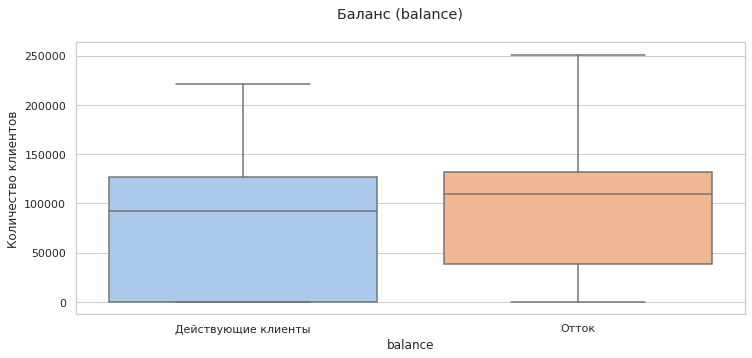

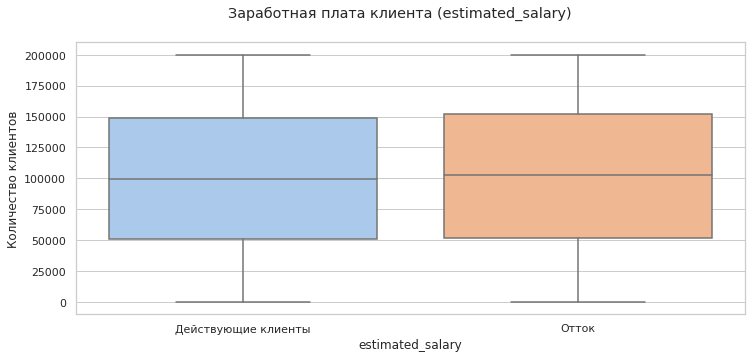

In [36]:
numeric = pd.DataFrame({'col' : ['score', 'age', 'balance', 'estimated_salary'], 
                        'title' : ['Баллы кредитного скорринга', 'Возраст', 
                                   'Баланс', 'Заработная плата клиента']
                       })

for index, row in numeric.iterrows():
    numeric_plots(data, row[0], row[1])

По графикам для численных параметров можно сделать следующие выводы:

- Среднее значение кредитного скоринга примерно равно для ушедших и оставшихся клиентов, а вот клиенты с минимальными значениями баланса больше склонны уходить, так как у распределений отточников больший хвост в начале;
- Клиенты в возрасте примерно от 40 до 50 лет более склонны уходить, тенденция прослеживается примерно до 65-70 лет;
- При средних значениях баланса клиентов вероятность оттока повышается;
- Зарплата клиента практически не влияет на отток.

### Корреляционный анализ

Для корреляционного анализа используем датасет `data_eda` из пункта 3.1 для участия всех параметров в анализе

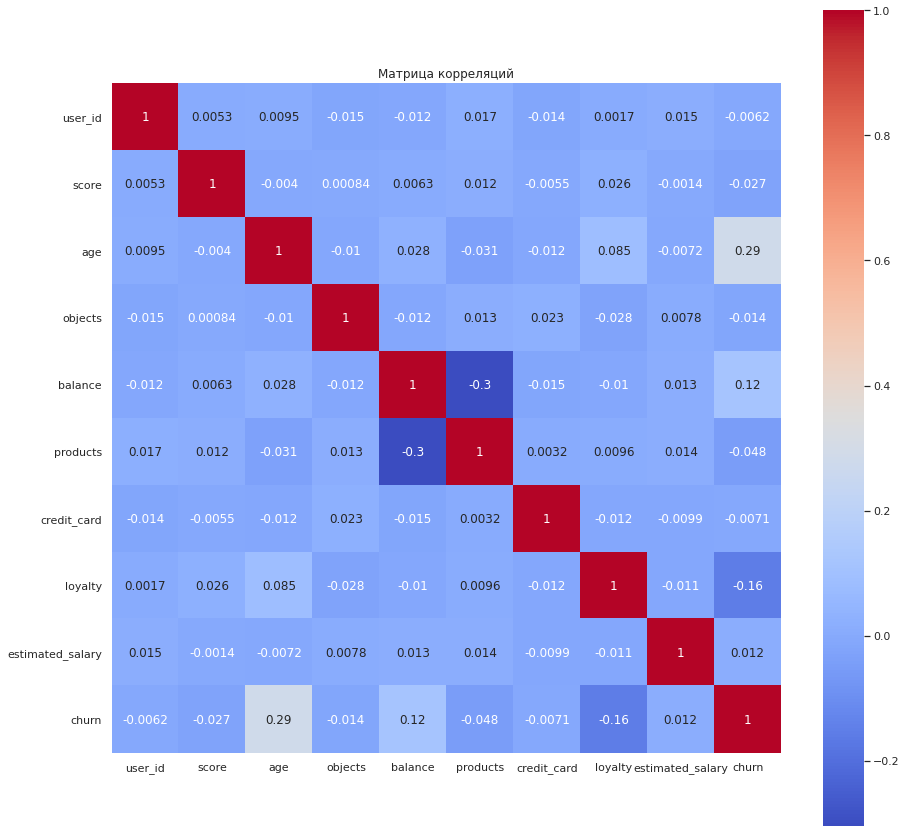

In [37]:
# построим матрицу корреляций и нарисуем тепловую карту

cm = data.corr() 
fig, ax = plt.subplots(figsize = (15, 15))

sns.heatmap(cm, annot = True, square=True, fmt = '.2g', cmap="coolwarm")

plt.title('Матрица корреляций')
plt.show()

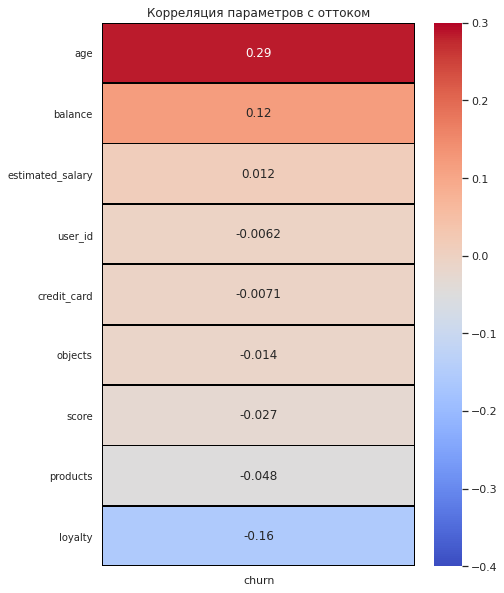

In [38]:
plt.figure(figsize=(7, 10))
heatmap = sns.heatmap(data.corr()[['churn']].sort_values(by='churn', ascending=False).drop(['churn'], axis=0), \
                      vmin=-0.4, vmax=0.3, annot=True, annot_kws={"size":12}, cmap='coolwarm', linewidths=1, linecolor='black')
plt.tick_params(axis='y', labelsize=10)
heatmap.set_title('Корреляция параметров с оттоком')
plt.show()

Имеется самая значительная корреляция  оттока с возрастом (коэффициент корреляции 0.29) - чем больше возраст, тем выше вероятность ухода клиента.

Далее по выраженности зависимости идут: 
- активность клиента = -0.16;
- баланс на счете = 0.12.

Для всех остальных признаков примечательна еще более слабая корреляция с оттоком.

Отсутствует очевидный признак, по которому можно было бы выявить склонность клиентов к оттоку. При этом признаков имеющих нулевую корреляцию с целевой переменной у нас тоже нет, как и сильно коррелирующих признаков между собой.

**Промежуточный вывод 3:**

По графикам для категориальных параметров:

- больше всего клиентов попадает в отток из Ростова Великого, затем идет Ярославль (где находится половина клиентов), меньше всего в отток уходят в Рыбинске;
- женщины больше мужчин перестают пользоваться услугами банка;
- количество объектов в собственности от 1 до 9 дает больший процент оттока, нежели у клиентов с 0 и 10 объектами;
- клиенты, пользующихся 1 продуктом, чаще всего уходят. Далее, с увеличением количества продуктов снижается количество ушедших клиентов, но при этом и оставшихся клиентов с 3 и 4 продуктами почти нет;
- в отток уходят больше те клиенты, кто пользуется кредитной картой;
- неактивные клиенты уходят с большей вероятностью.

По графикам для численных параметров:

- среднее значение кредитного скоринга примерно равно для ушедших и оставшихся клиентов, а вот клиенты с минимальными значениями баланса больше склонны уходить, так как у распределений отточников больший хвост в начале;
- клиенты в возрасте примерно от 40 до 50 лет более склонны уходить, тенденция прослеживается примерно до 65-70 лет;
- при средних значениях баланса клиентов вероятность оттока повышается;
- зарплата клиента практически не влияет на отток.

По корреляционному анализу:
- имеется самая значительная корреляция оттока с возрастом (коэффициент корреляции 0.29) - чем больше возраст, тем выше вероятность ухода клиента.
- далее по выраженности зависимости идут:
    - активность клиента = -0.16;
    - баланс на счете = 0.12.
- для всех остальных признаков примечательна еще более слабая корреляция с оттоком.

*Отсутствует очевидный признак, по которому можно было бы выявить склонность клиентов к оттоку.*

## Выделение портретов клиентов, которые склонны уходить из банка

По итогам проведенного анализа можно предварительно выделить портреты клиентов

### Признаки клиентов, которые склонны уходить в отток:


- клиент из Ярославля или Ростова Великого;
- чаще всего женщины;
- клиент в возрасте примерно от 40 до 50 лет, тенденция прослеживается примерно до 65-70 лет;
- клиент имеет 1 до 9 объектов собственности;
- клиент с низким баллом кредитного скоринга (менее 600 баллов);
- неактивный клиент;
- клиент имеет кредитную карту;
- клиент с высокой заработной платой (более 100 000);
- среднее значение баланса на счете (около 120 000);
- клиент пользующийся 3 или 4 продуктами банка.

### Признаки клиентов, которые не склонны уходить в отток:

- клиент из Рыбинска;
- чаще всего это мужчины;
- клиент молодого и среднего возрастов;
- клиент имеет от 1 до 9 объектов собственности;
- клиенты со средним и высоким баллом кредитного скоринга;
- активный клиент;
- клиент имеет кредитную карту;
- клиент со средней и высокой заработной платой;
- среднее значение баланса на счете (около 120 000);
- клиент пользующийся 1 или 2 продуктами банка.

## Формулировка и проверка статистических гипотез

In [39]:
# для проверки гипотез установим уровень статистической значимости, равный 0,05.

alpha = 0.05

### Гипотеза различия дохода между действующими и ушедшими клиентами

Проверим гипотезу различия дохода между действующими и ушедшими клиентами. Изучим распределение выборок.

**Гипотеза H0**: доходы у действующих и ушедших клиентов равны.

**Гипотеза Н1**: доходы у действующих и ушедших клиентов не равны.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


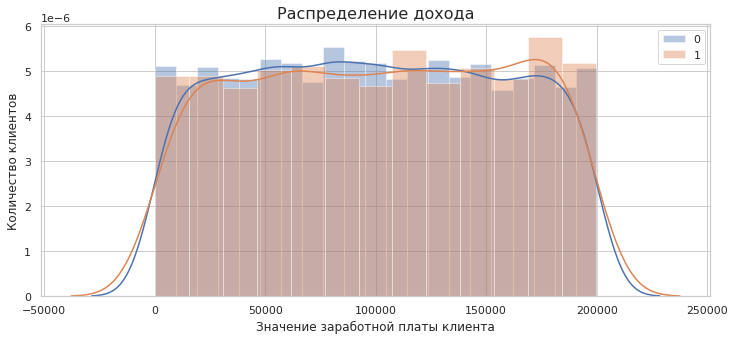

In [40]:
# проверим данные на нормальность распределения

sns.distplot(data.query('churn == 0')['estimated_salary'], label=0)
sns.distplot(data.query('churn == 1')['estimated_salary'], label=1)
plt.title('Распределение дохода', fontsize=16)
plt.ylabel('Количество клиентов')
plt.xlabel('Значение заработной платы клиента')
plt.legend()
plt.show()

По графику можно сказать, что распределение приближенно к нормальному.

In [41]:
# посмотрим на дисперсии сравниваемых генеральных совокупностей

print('Дисперсия первой выборки =', round(np.var(data.query('churn == 0')['estimated_salary']),2))
print('Дисперсия второй выборки =', round(np.var(data.query('churn == 1')['estimated_salary']),2))

Дисперсия первой выборки = 3294987155.9
Дисперсия второй выборки = 3352202354.71


In [42]:
# посмотрим на размер выборок

data.groupby('churn')['estimated_salary'].count().to_frame()

,estimated_salary
churn,
0,7963
1,2037


В данном случае рассматривается гипотеза о равенстве между собой средних двух генеральных совокупностей. Значения в выборках распределены равномерно, выбросов нет, дисперсии равны. Следовательно используем параметрический метод `ttest_ind`. 

In [43]:
# проверим гипотезу о равенстве средних двух генеральных совокупностей

results = st.ttest_ind(
    data.query('churn == 0')['estimated_salary'], 
    data.query('churn == 1')['estimated_salary'])

p_value = results.pvalue

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: доходы у действующих и ушедших клиентов не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу: доходы у действующих и ушедших клиентов равны")

p-значение: 0.22644173695461328
Не получилось отвергнуть нулевую гипотезу: доходы у действующих и ушедших клиентов равны


р-значение больше уровня критической значимости, следовательно, нет причин отвергать нулевую гипотезу. Вывод о различии доходов действующих и ушедших клиентов сделать нельзя.

### Гипотеза различия баллов кредитного скоринга между действующими и ушедшими клиентами

Проверим гипотезу различия баллов кредитного скоринга между действующими и ушедшими клиентами. Изучим распределение выборок.

**Гипотеза H0**: баллы кредитного скоринга у действующих и ушедших клиентов равны.

**Гипотеза Н1**: баллы кредитного скоринга у действующих и ушедших клиентов не равны.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


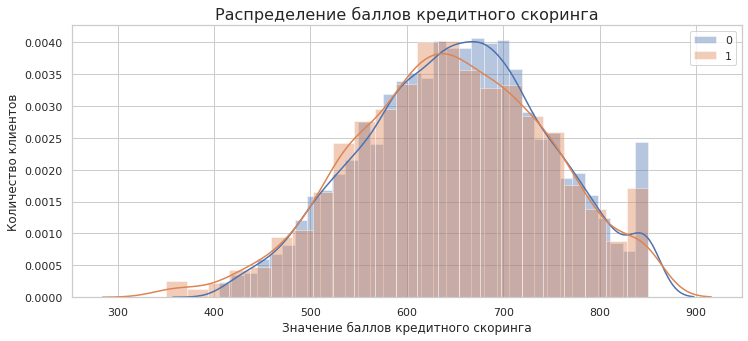

In [44]:
# проверим данные на нормальность распределения

sns.distplot(data.query('churn == 0')['score'], label=0)
sns.distplot(data.query('churn == 1')['score'], label=1)
plt.title('Распределение баллов кредитного скоринга', fontsize=16)
plt.ylabel('Количество клиентов')
plt.xlabel('Значение баллов кредитного скоринга')
plt.legend()
plt.show()

По графику можно сказать, что распределение приближенно к нормальному.

In [45]:
# посмотрим на дисперсии сравниваемых генеральных совокупностей

print('Дисперсия первой выборки =', round(np.var(data.query('churn == 0')['score']),2))
print('Дисперсия второй выборки =', round(np.var(data.query('churn == 1')['score']),2))

Дисперсия первой выборки = 9148.51
Дисперсия второй выборки = 10059.46


Дисперсии выборок различаются в пределах 10%. В данном случае рассматривается гипотеза о равенстве между собой средних двух генеральных совокупностей. Значения в выборках распределены достаточно равномерно. Следовательно используем параметрический метод ttest_ind.

In [46]:
# проверим гипотезу о равенстве средних двух генеральных совокупностей

results = st.ttest_ind(
    data.query('churn == 0')['score'], 
    data.query('churn == 1')['score'])

p_value = results.pvalue

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: баллы кредитного скоринга у действующих и ушедших клиентов не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу: баллы кредитного скоринга у действующих и ушедших клиентов равны")

p-значение: 0.006738213892192373
Отвергаем нулевую гипотезу: баллы кредитного скоринга у действующих и ушедших клиентов не равны


р-значение меньше уровня критической значимости, следовательно, отвергаем нулевую гипотезу. Можно сделать вывод о различии баллов действующих и ушедших клиентов. Уходящие пользователи становятся менее заинтересованными в продуктах банка и их активнсть падает.

### Гипотеза различия возраста между действующими и ушедшими клиентами

Проверим гипотезу различия возраста между действующими и ушедшими клиентами. Изучим распределение выборок.

**Гипотеза H0**: возраст у действующих и ушедших клиентов равен.

**Гипотеза Н1**: возраст у действующих и ушедших клиентов не равен.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


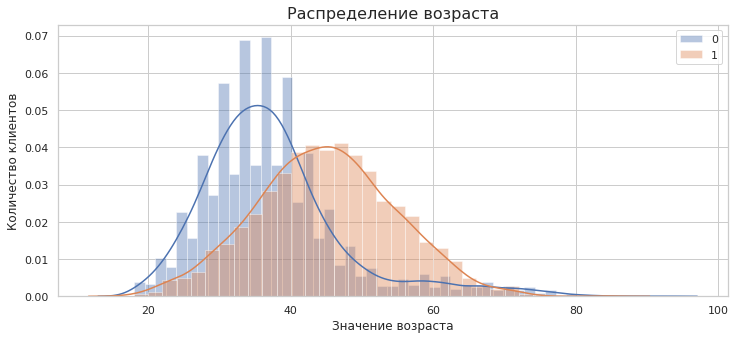

In [47]:
# проверим данные на нормальность распределения

sns.distplot(data.query('churn == 0')['age'], label=0)
sns.distplot(data.query('churn == 1')['age'], label=1)
plt.title('Распределение возраста', fontsize=16)
plt.ylabel('Количество клиентов')
plt.xlabel('Значение возраста')
plt.legend()
plt.show()

In [48]:
# посмотрим на дисперсии сравниваемых генеральных совокупностей

print('Дисперсия первой выборки =', round(np.var(data.query('churn == 0')['age']),2))
print('Дисперсия второй выборки =', round(np.var(data.query('churn == 1')['age']),2))

Дисперсия первой выборки = 102.51
Дисперсия второй выборки = 95.24


Распределение не совсем равномерное, есть небольшой перекос в виде нескольких клиентов пред- и пенсионного возраста. Поэтому вместо t-критерия Стьюдента будем использовать аналогичный методы U-критерий Манна — Уитни, которорый является непараметрическим аналогом критерия Стьюдента

In [49]:
# проверим гипотезу о равенстве средних двух генеральных совокупностей

results = st.mannwhitneyu(
    data.query('churn == 0')['age'], 
    data.query('churn == 1')['age'])

p_value = results.pvalue

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: возраст у действующих и ушедших клиентов не равен")
else:
    print("Не получилось отвергнуть нулевую гипотезу: возраст у действующих и ушедших клиентов равен")

p-значение: 3.2104014319371675e-230
Отвергаем нулевую гипотезу: возраст у действующих и ушедших клиентов не равен


In [50]:
# посмотрим на средние и меданные значения возраста у действующих и ушедших клиентов

display(data.pivot_table(index='churn', values='age', aggfunc='mean'))
display(data.pivot_table(index='churn', values='age', aggfunc='median'))

,age
churn,
0,37.41
1,44.84


,age
churn,
0,36
1,45


р-значение меньше уровня критической значимости, следовательно, отвергаем нулевую гипотезу. Можно сделать вывод о различии возраста действующих и ушедших клиентов. Как видно, разница в возрасте составляет около 10 лет.

**Промежуточный вывод 4:**

Были проверены следующие гипотезы:

- о равенстве различия дохода между действующими и ушедшими клиентами. Нулевая гипотеза подтвердилась. Вывод о различии доходов действующих и ушедших клиентов сделать нельзя.
- о равенстве различия баллов кредитного скоринга между действующими и ушедшими клиентами. Нулевая гипотеза не подтвердилась. Уходящие пользователи становятся менее заинтересованными в продуктах банка и их активнсть падает.
- о равенстве баллов скоринга между теми клиентами, которые ушли и теми, которые остались. Нулевая гипотеза не подтвердилась. Разница в возрасте составляет около 10 лет.

## Сегментация клиентов

Проведем сегментацию клиентов. Переведем категориальные переменные в численные с использованием `one-hot encoding`.

In [51]:
# переводим категориальные данные в числовые
city = pd.get_dummies(data.city).iloc[::]
gender = pd.get_dummies(data.gender).iloc[::]

# объединяям новые столбцы с датасетом, удаляем столбцы city и gender с категориальными значениями
data_segment = pd.concat([data, gender, city], axis=1)
data_segment =  data_segment.drop(['city', 'gender'], axis=1)

data_segment.head(5)     

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,Ж,М,Ростов Великий,Рыбинск,Ярославль
0,15677338,619,42,2,0,1,1,1,101348,1,1,0,0,0,1
1,15690047,608,41,1,83807,1,0,1,112542,0,1,0,0,1,0
2,15662040,502,42,8,159660,3,1,0,113931,1,1,0,0,0,1
3,15744090,699,39,1,0,2,0,0,93826,0,1,0,0,0,1
4,15780624,850,43,2,125510,1,1,1,79084,0,1,0,0,1,0


In [52]:
# обязательная стандартизация данных перед работой с алгоритмами

sc = StandardScaler()
X_sc = sc.fit_transform(data_segment.drop(columns = 'churn')) 

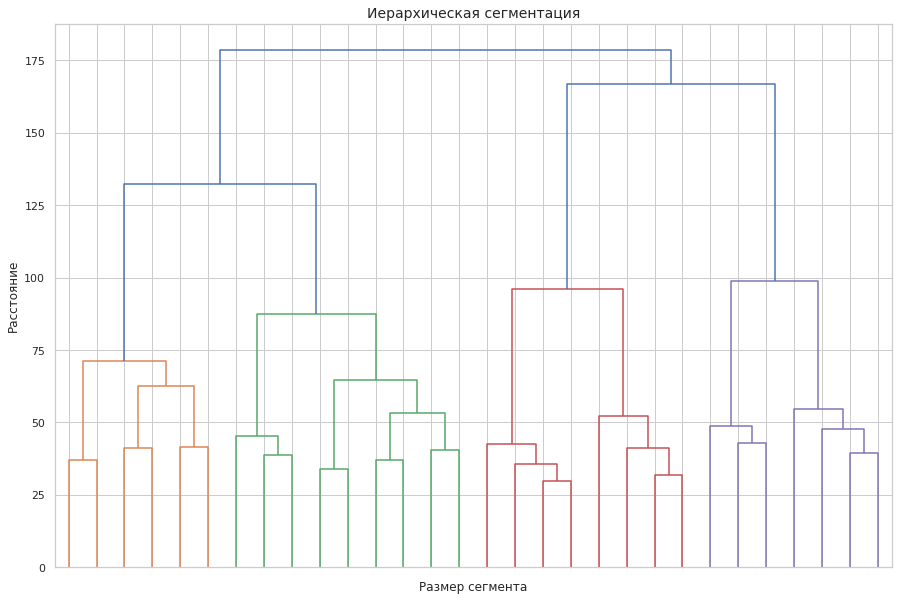

In [53]:
# построим таблицу расстояний между объектами
linked = linkage(X_sc, method = 'ward')

# построим дендрограмму
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', show_leaf_counts=False, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=14)
plt.title('Иерархическая сегментация', fontsize=14)
plt.xlabel('Размер сегмента', fontsize=12)
plt.ylabel('Расстояние', fontsize=12)
plt.show()

Получаем 4 разных цвета на графике, предложенное число сегментов - 4.

In [54]:
# задаём модель k_means с числом сегментов 4 и фиксируем значение random_state
km = KMeans(n_clusters = 4, random_state = 0)

# применяем алгоритм к данным и формируем вектор сегментов (алгоритм присваивает им номера от 0 до 3)
labels = km.fit_predict(X_sc)

# сохраняем метки сегментов в поле нашего датасета
data_segment['segment'] = labels

# выводим статистику по средним значениям наших признаков по сегменту
segment_means = data_segment.groupby(['segment']).mean().sort_values('churn').T
segment_means

segment,1,2,3,0
user_id,"15,732,029.21","15,734,654.41","15,735,038.29","15,733,291.65"
score,650.06,651.33,649.19,651.45
age,38.30,38.89,38.77,39.77
objects,5.05,5.03,4.95,5.01
balance,"63,546.03","61,817.89","60,322.41","119,729.62"
products,1.52,1.54,1.55,1.52
credit_card,0.71,0.69,0.70,0.71
loyalty,0.52,0.53,0.51,0.50
estimated_salary,"100,173.76","99,440.08","99,563.76","101,112.94"
churn,0.13,0.17,0.20,0.32


По полученным данным приведем следующие выводы по сегментам:

**1. 1 сегмент с долей оттока 13% (*самый низкий показатель*):**

- средний балл кредитного скоринга равен 650;
- предпочтительно мужчины;
- предпочтительно из Ярославля;
- средний возраст клиентов около 38 лет;
- среднее количество объектов в собственности равно 5;
- средняя сумма на счете клиента равна 63 546;
- количество продуктов, которыми пользуется клиент от 1 до 2;
- наличие кредитной карты у 71% клиентов;
- 52% клиентов пользовались продуктами банка;
- средняя заработная плата клиентов равна 100 173.

**2. 2 сегмент с долей оттока 17%:**

- средний балл кредитного скоринга равен 651;
- приблизительно равное распределение между мужчинами и женщинами;
- предпочтительно из Рыбинска;
- средний возраст клиентов около 38 лет;
- среднее количество объектов в собственности равно 5;
- средняя сумма на счете клиента равна 61 817;
- количество продуктов, которыми пользуется клиент от 1 до 2;
- наличие кредитной карты у 69% клиентов;
- 53% клиентов пользовались продуктами банка;
- средняя заработная плата клиентов равна 99 440.

**3. 3 сегмент с долей оттока 20%:**

- средний балл кредитного скоринга равен 649;
- предпочтительно женщицы;
- предпочтительно из Ярославля;
- средний возраст клиентов около 38 лет;
- среднее количество объектов в собственности равно 5;
- средняя сумма на счете клиента равна 60 332;
- количество продуктов, которыми пользуется клиент от 1 до 2;
- наличие кредитной карты у 70% клиентов;
- 51% клиентов пользовались продуктами банка;
- средняя заработная плата клиентов равна 99 563.

**0. 0 сегмент с долей оттока 32% (*самый высокий показатель*):**

- средний балл кредитного скоринга равен 651;
- приблизительно равное распределение между мужчинами и женщинами;
- предпочтительно из Ростова Великого;
- средний возраст клиентов около 39 лет;
- среднее количество объектов в собственности равно 5;
- средняя сумма на счете клиента равна 119 729;
- количество продуктов, которыми пользуется клиент от 1 до 2;
- наличие кредитной карты у 71% клиентов;
- 50% клиентов пользовались продуктами банка;
- средняя заработная плата клиентов равна 101 112.

In [55]:
# Покажем для каждого сегмента долю оттока

data_segment.groupby('segment').agg({'churn':'mean'}).sort_values(by='churn')

,churn
segment,
1,0.13
2,0.17
3,0.20
0,0.32


Сегменты, которые склонны к оттоку, это следующие:

- сегмент 1 с вероятностью 13%, с самым низким показателем
- сегмент 2 с вероятностью 17%
- сегмент 3 с вероятностью 20%
- сегмент 0 с вероятностью 32%, с самым высоким показателем

## Выводы и рекомендации

В ходе проведения исследования были проанализированы данные о клиентах банка "Метанпром", обслуживающихся в отделениях городов Ярославль, Ростов Великий и Рыбинск.

1. Изучили общую информацию:

- 10 000 строк и 12 столбцов, из которых в одном столбце Balance с данными о балансе счета клиента имеются 3617 пропусков;
- в столбцах представлены три типа данных - строки, целочисленные и вещественные числа. С типом данных все в порядке;

2. Провели предобработку данных:
- привели названия столбцов к нижнему регистру, изменили стиль названия;
- проверили количество пропущенных значений в столбце Balance - 3617 из 10 000. Провели замену пропущенных значений на нули на основании предположения, что пропуски означают отсутствие у клиента счета в банке (например, дебетовой карты);
- проверили характер пропущенных (нулевых) значений, которые встречаются:


    - в 2-х городах из 3-х, в Ярославле - 2418, в Рыбинске - 1199;
    - активность клиентов распределяется примерно поровну;
    - у 2592 клиентов есть, 1025 - не имеют кредитной карты;
    - 3117 действующих и 500 ушедших клиентов.
    - характер и признаки нулевых значений в значениях баланса на счете клиента выявить не удалось. Возможно это просто незаполненные данные, либо техническая особенность системы для клиентов не имеющих дебетовой карты.
    - проверили количество дубликатов - их нет;
    - для удобства привели значения столбцов с балансом и зарплатой к целочисленному типу.


- Провели категоризацию данных


    - Баллы кредитного скоринга - почти 40% клиентов имеют средний балл (что, по данным из Интернета достаточно для одобрения кредита). Около 31% клиентов имеют высокий и 30% - низкий баллы.
    - Возраст - почти 80% клиентов от 18 до 45 лет, около 15% - в диапазоне от 46 до 60 лет, около 5% - старше 61 года.
    - Число объектов в собственности клиента - у 45% клиентов в собственности более 5 объектов, что довольно неожиданно. 30% имеет от 3 до 5 объектов, 20% - от 1 до 2 объектов, и около 4% не имеет объектов.
    - Баланс на счете - почти 50% клиентов имеют на счете более 100 000, 15% - от 50 до 100 тысяч. В категории от 30 до 50 тысяч около 6%, от 5 до 30 тысяч - около 1%. Внушительный процент имеет менее 5000 на счете - около 36%.
    - Заработная плата - 50% клиентов имеют высокий достаток, около 25% клиентов имеют средний и низкий достатки.


3. Провели исследовательский анализ данных:
- По построенным графикам для категориальных параметров:


    - больше всего клиентов попадает в отток из Ростова Великого, затем идет Ярославль (где находится половина клиентов), меньше всего в отток уходят в Рыбинске;
    - женщины больше мужчин перестают пользоваться услугами банка;
    - количество объектов в собственности от 1 до 9 дает больший процент оттока, нежели у клиентов с 0 и 10 объектами;
    - с увеличением количества продуктов снижается количество ушедших клиентов, но при этом и оставшихся клиентов с 3 и 4 продуктами почти нет;
    - в отток уходят больше те клиенты, кто пользуется кредитной картой;
    - неактивные клиенты уходят с большей вероятностью.


- По построенным графикам для численных параметров:


    - среднее значение кредитного скоринга примерно равно для ушедших и оставшихся клиентов, а вот клиенты с минимальными значениями баланса больше склонны уходить, так как у распределений отточников больший хвост в начале;
    - клиенты в возрасте примерно от 40 до 50 лет более склонны уходить, тенденция прослеживается примерно до 65-70 лет;
    - при средних значениях баланса клиентов вероятность оттока повышается;
    - зарплата клиента практически не влияет на отток.


- По корреляционному анализу:


    - имеется самая значительная корреляция оттока с возрастом (коэффициент корреляции 0.29) - чем больше возраст, тем выше вероятность ухода клиента.
    - далее по выраженности зависимости идут:
        - активность клиента = -0.16;
        - баланс на счете = 0.12.
    - для всех остальных признаков примечательна еще более слабая корреляция с оттоком.


*Отсутствует очевидный признак, по которому можно было бы выявить склонность клиентов к оттоку*


4. Выделили портреты клиентов, склонных уходить из банка:

- Признаки клиентов, которые склонны уходить в отток:


    - клиент из Ярославля или Ростова Великого;
    - чаще всего женщины;
    - клиент в возрасте примерно от 40 до 50 лет, тенденция прослеживается примерно до 65-70 лет;
    - клиент имеет 1 до 9 объектов собственности;
    - клиент с низким баллом кредитного скоринга (менее 600 баллов);
    - неактивный клиент;
    - клиент имеет кредитную карту;
    - клиент с высокой заработной платой (более 100 000);
    - среднее значение баланса на счете (около 120 000);
    - клиент пользующийся 3 или 4 продуктами банка.


- Признаки клиентов, которые не склонны уходить в отток:


    - клиент из Рыбинска;
    - чаще всего это мужчины;
    - клиент молодого и среднего возрастов;
    - клиент имеет от 1 до 9 объектов собственности;
    - клиенты со средним и высоким баллом кредитного скоринга;
    - активный клиент;
    - клиент имеет кредитную карту;
    - клиент со средней и высокой заработной платой;
    - среднее значение баланса на счете (около 120 000);
    - клиент пользующийся 1 или 2 продуктами банка.


5. Сформулировали и проверили статистические гипотезы:
- о равенстве различия дохода между действующими и ушедшими клиентами. Нулевая гипотеза подтвердилась. Вывод о различии доходов действующих и ушедших клиентов сделать нельзя.
- о равенстве различия баллов кредитного скоринга между действующими и ушедшими клиентами. Нулевая гипотеза не подтвердилась. Уходящие пользователи становятся менее заинтересованными в продуктах банка и их активнсть падает.
- о равенстве баллов скоринга между теми клиентами, которые ушли и теми, которые остались. Нулевая гипотеза не подтвердилась. Разница в возрасте составляет около 10 лет.

6. Провели сегментацию клиентов
- провели сегментацию клиентов: построили матрицу расстояний функцией linkage() на стандартизованной матрице признаков, после чего обучили модель сегментации на основании алгоритма K-Means. В результате были получены 4 сегмента, т.е. 3 портрета клиентов.

- наиболее отточным показался сегмент 0 с долей оттока в 32%:


    - средний балл кредитного скоринга равен 651;
    - приблизительно равное распределение между мужчинами и женщинами;
    - предпочтительно из Ростова Великого;
    - средний возраст клиентов около 39 лет;
    - среднее количество объектов в собственности равно 5;
    - средняя сумма на счете клиента равна 119 729;
    - количество продуктов, которыми пользуется клиент от 1 до 2;
    - наличие кредитной карты у 71% клиентов;
    - 50% клиентов пользовались продуктами банка;
    - средняя заработная плата клиентов равна 101 112.


- наименее отточным показался сегмент 1 с долей оттока 13%:


    - средний балл кредитного скоринга равен 650;
    - предпочтительно мужчины;
    - предпочтительно из Ярославля;
    - средний возраст клиентов около 38 лет;
    - среднее количество объектов в собственности равно 5;
    - средняя сумма на счете клиента равна 63 546;
    - количество продуктов, которыми пользуется клиент от 1 до 2;
    - наличие кредитной карты у 71% клиентов;
    - 52% клиентов пользовались продуктами банка;
    - средняя заработная плата клиентов равна 100 173.


**Рекомендации:**

Для клиентов из Ярославля и Ростова Великого провести анализ качества предоставляемых услуг, обратить внимание на следующие группы:
- имеющих 3-4 продукта в пользовании.
- женского пола в возрасте от 45 до 70 лет;
- низкой активности;
- по возможности пересмотреть баллы кредитного скоринга и актуализировать информацию.

Вышеуказанным группам можно предложить особые условия продуктов, которыми они пользуются, возможно следует завлечь данную группу клиентов особыми льготами или услугами.